<a href="https://colab.research.google.com/github/YonniYe/WebGIS_Learning/blob/main/lfptools-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepared by Jeison Sosa

University of Bristol

https://jsosa.github.io


# 1. LISFLOOD-FP
***

**LISFLOOD-FP** is a two-dimensional hydrodynamic model specifically designed to simulate floodplain inundation in a computationally efficient manner over complex topography. It is capable of simulating grids up to 106 cells for dynamic flood events and can take advantage of new sources of terrain information from remote sensing techniques such as airborne laser altimetry and satellite interferometric radar.

The model predicts water depths in each grid cell at each time step, and hence **can simulate the dynamic propagation of flood waves over fluvial, coastal and estuarine floodplains**. It is a non-commercial, research code developed as part of an effort to improve our fundamental understanding of flood hydraulics, flood inundation prediction and flood risk assessment.

**LISFLOOD-FP has been used as a research tool:**

* within the pre-operational European Flood Alert System (EFAS) being developed by Dr. Ad De Roo at the EU Joint Research Centre,
* as part of the RASP tiered methodology for flood risk assessment being developed on behalf of the Environment Agency of England and Wales and DEFRA
* and for research studies at a number of institutions, including Ohio State and the University of Washington in the USA and the University of Messina in Italy.

**LISFLOOD-FP has also stimulated the development of a number of academic and commercial codes based on its principles including:**

* MDSFLOOD, developed by University of Bristol for Halcrow Ltd as a storage cell code demonstrator.
* JFLOW, developed by JBA Consulting as a broad-scale flood risk assessment tool and used, among other projects, to produce the Extreme Flood Outline maps for the whole of the England and Wales on Behalf of the Environment Agency and as a generic method for the Scottish Executive.
* FLOWROUTETM, developed by Ambiental Risk Analytics as a flood risk assessment tool for the insurance and planning industries on behalf of clients including Norwich Union, Aon and BP.
* Numerous research codes including those developed by **Venere and Clausse (2002)**, **Dhondia and Stelling (2002)**, **Coe et al., (2002)**, **Bradbrook et al. (2004)** and **Yu and Lane (2006)**.

After **Sampson et al., (2015)**

![picture](https://drive.google.com/uc?export=view&id=1ZAx8ZnH7k9MF9zlDX3QztCw7Z6aJzPoQ)

# 2. LFPtools
***

`LFPtools` is an open-source Python CLI package which encompass most methods commonly used to prepare input data for large scale flood inundation studies using the [LISFLOOD-FP](http://www.bristol.ac.uk/geography/research/hydrology/models/lisflood/) hydrodynamic model.

## Description of tools

**lfp-getdepths:** Get river depths, three methods availables: 1) get depths from a raster of depths 2) get depths by using hydraulic geometry equation depth = r * width ^ p and 3) get depths by using simplified mannings equation

**lfp-getwidths:** Retrieve river widths from a external data set (e.g. [GRWL](http://science.sciencemag.org/content/early/2018/06/27/science.aat0636), [GWD-LR](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2013WR014664))

**lfp-getbankelevs:** Get river banks elevations from a high resolution DEM by reductions method like nearest neighbour, mean, min or meanmin. Additionally, an outlier detection can be applied to before running the reduction method.

**lfp-fixelevs:** Fix DEM elevations using either of two methods: `yamazaki` (**Yamazaki et al., 2012 J. Hydrol**), `lowless` (Locally Weighted Scatterplot Smoothing)

**lfp-getbedelevs:** Get bed elevations by substracting depth from banks

**lfp-getdischarge:** Retrieve discharge from a netCDF source following a predefined inflows locations (e.g. from lfp-getinflows)

**lfp-getinflows:** Locate inflow points that can be used as boundary condition from a source (e.g. discharge gridded data)

**lfp-getslopes:** Estimate slopes from a bank file (e.g. from lfp-fixelevs), slope is estimated by fitting a 1st order model on the elevations. The number of elevations to take is based on the parameter `step` in the `config.txt` file

**lfp-rasterresample:** Resample a DEM by upscaling. It applies a reductions method like mean, min or meanmin. Outlier detection is also available before running the reduction method. `nproc` option defines number of cores to be used when resampling.

## Installation

### 1. Via pip
Just run this line after installing all dependencies

``` pip install git+https://github.com/jsosa/LFPtools.git```

### 2. Docker
To facilitate the installation process, we have published the [Dockerfile](https://github.com/jsosa/LFPtools/blob/master/docker/Dockerfile) so you can get `LFPtools` running in a docker container

```bash
docker pull jsosa/dkr-lfptools
docker run --rm -it jsosa/dkr-lfptools
```

## Dependencies

- [Pandas](https://pandas.pydata.org/)
- [Geopandas](http://geopandas.org/)
- [xarray](http://xarray.pydata.org/en/stable/)
- [Cython](https://cython.org/)
- [TauDEM](http://hydrology.usu.edu/taudem/taudem5/index.html)
- [gdalutils](https://github.com/jsosa/gdalutils.git)

# 3. What's Colab?
***



Colaboratory (Colab) is a Google research project created to help disseminate machine learning education and research. It's a Jupyter notebook environment that requires no setup to use and runs entirely in the cloud.



This quick video will explain what's Colab and its basic functionalities

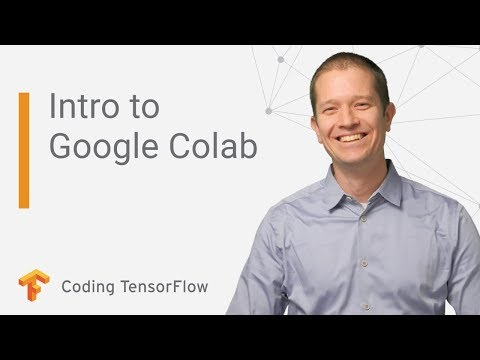

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI')

# 4. Using LFPtools in Colab
***

The following notebook will guide you on how to use LFPtools in Colab!

Some advantages:

* The tools run directly in the cloud using the Google servers
* No need to install anything in your local computer
* No need to deal with Python dependencies

#### Installing LFPtools dependencies

In [2]:
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
import io
import os
import shutil
from glob import glob
os.chdir('spatialindex-src-1.8.5')
!./configure
!make
!make install
!pip install rtree
!ldconfig
!pip install geopandas
!pip install git+https://github.com/jsosa/gdalutils.git
os.chdir('/content')
shutil.rmtree('sample_data')
shutil.rmtree('spatialindex-src-1.8.5')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   809k      0 --:--:-- --:--:-- --:--:--  808k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

#### Installing LFPtools via pip

In [3]:
!pip install git+https://github.com/jsosa/LFPtools.git

  Cloning https://github.com/jsosa/LFPtools.git to /tmp/pip-req-build-uttojapo
  Running command git clone -q https://github.com/jsosa/LFPtools.git /tmp/pip-req-build-uttojapo
  Created wheel for lfptools: filename=lfptools-0.1-cp36-cp36m-linux_x86_64.whl size=347886 sha256=94490fc3ceca32ebe19f11656eac39a6f4cb7715c17b2302d423c2524aa986b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-gespr3t3/wheels/37/5f/8d/2b12dab8f3fcf55676cdce40a431a858bbc05d8a1c099b8845
Successfully built lfptools


#### Download now the needed files to preprocess to your local machine

Files of this example are available at:
https://drive.google.com/open?id=1mBxrnV2NXlIViaTPVrGmjTxBVsyJbpLM

There are 6 files in the folder

* **062_dis.csv :** File containing streamflow data
* **062_rec.csv :** Topological connectivity of the main channel and reaches
* **062_dem_lidar.tif :** DEM derived from LIDAR
* **062_dir.tif :** Directions map
* **062_net.tif :** River network mask
* **062_wth_grwl.tif :** River width data from GRWL

These files can be generated manually or alternatively using **lfp-predata** and **lfp-split** also available in the LFPtools toolbox

#### Upload previous files to the cloud using the following steps

![picture](https://drive.google.com/uc?export=view&id=1RQuRricnvaKPdqqtnlK3fqq18QXFnkt8)

#### Check files are in the cloud


In [4]:
!ls

062_dem_lidar.tif  062_dis.csv	062_rec.csv	  lisflood_euflood
062_dir.tif	   062_net.tif	062_wth_grwl.tif


#### Importing LFPTools in Colab with one line

In [5]:
import lfptools as lfp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 5. A flood inundation model for the Severn River in England, UK
***

LFPTools was used to build a flood inundation model for the Severn river basin in the UK. A one-month simulation (April 1998) was undertaken in order to capture an observed flood event that happened during this period.  An additional one month ‘warm-up’ period was included to bring the model into a hydraulic steady state condition prior to the commencement of the April 1998 period. The model was built from LIDAR-based terrain data (at 90 m resolution) where the floodplain terrain was upscaled to 1 km resolution using the ‘mean’ aggregation method and removing outliers. Bank heights were defined using the ‘nearest neighbour’ method. River channels were explicitly represented using HydroSHEDS (Lehner et al., 2008) as input hydrography at 1 km resolution. Channel widths were retrieved from the GRWL database while river depths were estimated through the hydraulic geometry method with r=0.12 and p=0.78. The model was forced using daily gauged flows from the UK National River Flow Archive (NRFA) for the simulation period mentioned before.

## Building the model using LFPtools
***

### Channel widths
Retrieve river widths from a external data set (e.g. GRWL, GWD-LR)

In [6]:
lfp.getwidths(thresh=0.02,
              output='./lfptools/062_wdt',
              recf='./062_rec.csv',
              netf='./062_net.tif',
              proj='+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs',
              fwidth='./062_wth_grwl.tif')

    running getwidths.py... constant threshold version
    running getwidths.py...


### Bank elevations
Get river banks elevations from a high resolution DEM by reductions method like nearest neighbour, mean, min or meanmin. Additionally, an outlier detection can be applied to before running the reduction method.

In [7]:
lfp.getbankelevs(outlier='yes',
                 method='near',
                 hrnodata=-9999,
                 thresh=0.00416,
                 output='./lfptools/062_bnk',
                 netf='./062_net.tif',
                 recf='./062_rec.csv',
                 hrdemf='./062_dem_lidar.tif',
                 proj='+proj=longlat + ellps=WGS84 + datum=WGS84 + no_defs')

    running getbankelevs.py...




```
# This is formatted as code
```

### Bank elevation smoothing
Fix DEM elevations using either of two methods: yamazaki (Yamazaki et al., 2012 J. Hydrol), lowless (Locally Weighted Scatterplot Smoothing)

In [8]:
lfp.fixelevs(method='yamazaki',
             source='./lfptools/062_bnk.shp',
             output='./lfptools/062_bnkfix',
             netf='./062_net.tif',
             recf='./062_rec.csv',
             proj='+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')

    running fixelevs.py...


/usr/local/lib/python3.6/dist-packages/lfptools/fixelevs.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['bnk_adj'][ids] = adjusted_dem


### Floodplain elevation resampling
Resample a DEM by upscaling. It applies a reductions method like mean, min or meanmin. Outlier detection is also available before running the reduction method. nproc option defines number of cores to be used when resampling.

In [9]:
lfp.rasterresample(nproc=4,
                   outlier='yes',
                   method='mean',
                   hrnodata=-9999,
                   thresh=0.00416,
                   demf='./062_dem_lidar.tif',
                   netf='./062_net.tif',
                   output='./lfptools/062_dem30.tif')

    running rasterresample.py...


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


### Channel depths
Get river depths, three methods available: 1) get depths from a raster of depths 2) get depths by using hydraulic geometry equation depth = r * width ^ p and 3) get depths by using simplified mannings equation

In [10]:
lfp.getdepths(proj='+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs',
              netf='./062_net.tif',
              method='depth_geometry',
              output='./lfptools/062_dpt',
              wdtf='./lfptools/062_wdt.shp',
              r=0.12,
              p=0.78)

    runnning getdepths.py...
getdepths.py - 614
getdepths.py - 613
getdepths.py - 612
getdepths.py - 611
getdepths.py - 610
getdepths.py - 609
getdepths.py - 608
getdepths.py - 607
getdepths.py - 606
getdepths.py - 605
getdepths.py - 604
getdepths.py - 603
getdepths.py - 602
getdepths.py - 601
getdepths.py - 600
getdepths.py - 599
getdepths.py - 598
getdepths.py - 597
getdepths.py - 596
getdepths.py - 595
getdepths.py - 594
getdepths.py - 593
getdepths.py - 592
getdepths.py - 591
getdepths.py - 590
getdepths.py - 589
getdepths.py - 588
getdepths.py - 587
getdepths.py - 586
getdepths.py - 585
getdepths.py - 584
getdepths.py - 583
getdepths.py - 582
getdepths.py - 581
getdepths.py - 580
getdepths.py - 579
getdepths.py - 578
getdepths.py - 577
getdepths.py - 576
getdepths.py - 575
getdepths.py - 574
getdepths.py - 573
getdepths.py - 572
getdepths.py - 571
getdepths.py - 570
getdepths.py - 569
getdepths.py - 568
getdepths.py - 567
getdepths.py - 566
getdepths.py - 565
getdepths.py - 564
ge



```
# This is formatted as code
```

### Channel bed elevations
Get bed elevations by substracting depth from banks

In [11]:
lfp.getbedelevs(bnkf='./lfptools/062_bnkfix.shp',
                dptf='./lfptools/062_dpt.shp',
                netf='./062_net.tif',
                output='./lfptools/062_bed',
                proj='+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')

    running getbedelevs.py...
loaded data
calculating bed from banks and depth
Index(['x', 'y', 'elevadj', 'geometry', 'bedelev'], dtype='object')
Writing out data


*italicized text*### Building files for LISFLOOD-FP
Generate required files to run a LISFLOOD-FP simulation

In [12]:
os.makedirs('lisfloodfp',exist_ok=True)
lfp.buildmodel(parlfp='./lisfloodfp/062.par',
               bcilfp='./lisfloodfp/062.bci',
               bdylfp='./lisfloodfp/062.bdy',
               evaplfp='./lisfloodfp/062.evap',
               gaugelfp='./lisfloodfp/062.gauge',
               stagelfp='./lisfloodfp/062.stage',
               dembnktif='./lisfloodfp/062_dembnk.tif',
               dembnktif_1D='./lisfloodfp/062_dembnk_1D.tif',
               bedtif='./lfptools/062_bed.tif',
               wdttif='./lfptools/062_wdt.tif',
               runcsv='./062_dis.csv',
               demtif='./lfptools/062_dem30.tif',
               fixbnktif='./lfptools/062_bnkfix.tif',
               dirtif='./062_dir.tif',
               reccsv='./062_rec.csv',
               date1='1998-03-01',
               date2='1998-05-01')
[shutil.copyfile(i, './lisfloodfp/'+os.path.basename(i)) for i in glob('./lfptools/*.asc')]

    running buildmodel.py...
     writing .bci file...
     writing .bdy file...
     writing .evap file...
     burning banks in dem...
     burning banks in dem 1D...
     writing ASCII files...
     writing .par file...


['./lisfloodfp/062_bed.asc', './lisfloodfp/062_wdt.asc']

#6. Running the simulation

#### Checking the parameters file

In [13]:
filepath = 'lisfloodfp/062.par'  
with open(filepath) as fp:  
   for cnt, line in enumerate(fp):
       print("Line {}: {}".format(cnt,line))

Line 0: latlong

Line 1: dirroot        062

Line 2: resroot        062

Line 3: sim_time       5270400

Line 4: initial_tstep  10.0

Line 5: massint        86400.0

Line 6: saveint        86400.0

Line 7: fpfric         0.06

Line 8: SGCn           0.035

Line 9: bcifile        062.bci

Line 10: bdyfile        062.bdy

Line 11: evaporation    062.evap

Line 12: DEMfile        062_dembnk.asc

Line 13: SGCbank        062_dembnk.asc

Line 14: SGCwidth       062_wdt.asc

Line 15: SGCbed         062_bed.asc



In [14]:
os.chdir('/content/lisfloodfp')
!chmod 777 ../lisflood_euflood
!../lisflood_euflood -v '062.par'

***************************
 LISFLOOD-FP version 7.0.4 (double)
Intel Compiler version: 1800
CPU instructions used: AVX2 AVX SSE_4.2 SSE_4.1 SSE3 SSE2 SSE
_DISABLE_WET_DRY.
_CALCULATE_Q_MODE 1.
***************************

Loading parameters... '062.par'
latlong
Lat-Long coordinate system on.
dirroot = 062
resroot = 062
sim_time = 5270400.000
initial_tstep = 10.000
massint = 86400.000
saveint = 86400.000
fpfric = 0.060
SGCn = 0.035
SGCn changed to 0.03500 
bcifile = 062.bci
bdyfile = 062.bdy
evaporation = 062.evap
DEMfile = 062_dembnk.asc
SGCbank = 062_dembnk.asc
SGCwidth = 062_wdt.asc
Using sub-grid channels and acceleration formulation
SGCbed = 062_bed.asc
SGC bed elevation read
Reading parameters done.

Reading command line.
Reading command line done.


Start Date: 20/1/2021 
Start Time: 4:0:34 

Loading DEM197x126
BL corner	(-3.191667,51.725000)
NODATA_value	-9999.000000
Done.

Loading SGCbank Done.
Loading SGCwidth Done.

Loading SGCbed:	062_bed.asc	SGC calc z done.
Loading bounda

# 7. Visualising results

In [15]:
!pip install rasterio

     |████████████████████████████████| 18.3MB 249kB/s 


In [16]:
import pandas as pd
import rasterio as rio
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Single map

In [17]:
def plot_raster(filepath):
  with rio.open(filepath) as src:
      fig, ax = plt.subplots(figsize=(15,10))
      img = ax.imshow(src.read(1),vmin=0,vmax=5)
      fig.colorbar(img, ax=ax)

Results for the 15th Apr 1998

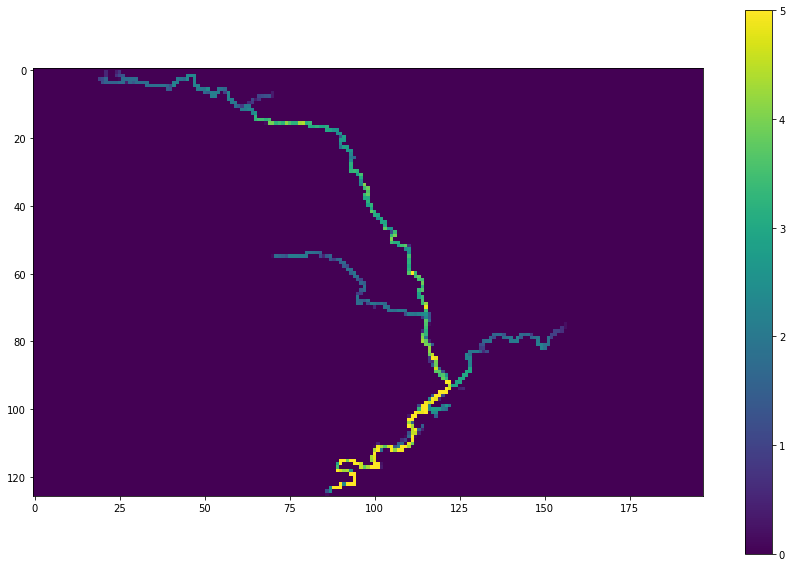

In [18]:
plot_raster('062/062-0046.wd')

## Animation

In [19]:
files = sorted(glob('062/*.wd'))
arr = []
for file in files:
  with rio.open(file) as src:
    arr.append(src.read(1))

In [20]:
dates = pd.date_range('1998-03-01','1998-05-01').strftime('%Y-%m-%d')
fig, ax = plt.subplots(figsize=(10, 5))

def update(i):
    im_normed = arr[i]
    ax.imshow(im_normed,vmin=0,vmax=7)
    ax.set_title('Severn river - ' + dates[i], fontsize=20)
    ax.set_axis_off()

anim = FuncAnimation(fig, update, frames=range(len(arr)), interval=1000)
anim.save('/content/animation.gif', dpi=80, writer='pillow')
plt.close()

**The animation will be saved in /content/animation.gif!**